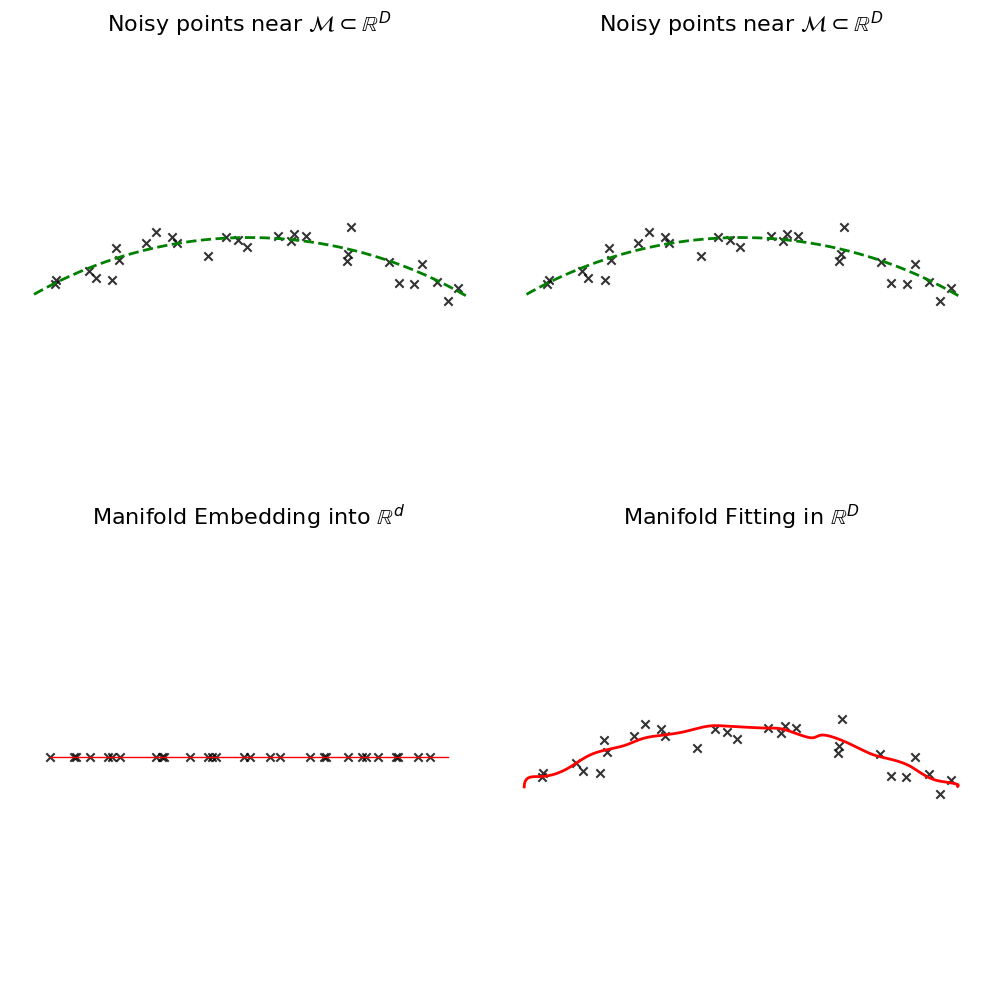

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev
import os

current_dir = os.getcwd()
project_dir = os.path.dirname(current_dir)
figure_dir = os.path.join(project_dir,"figures","figures")

# Set seed for reproducibility
np.random.seed(13)

# Parameters
radius = 2.0
center_angle = np.pi / 2
angle_range = np.pi / 6
theta = np.linspace(center_angle - angle_range, center_angle + angle_range, 200)
theta_display = np.linspace(center_angle - angle_range+5, center_angle + angle_range-5, 200)

# Clean arc
x_arc = radius * np.cos(theta)
y_arc = radius * np.sin(theta)

# Noisy version
x_arc_noisy = x_arc + np.random.normal(0, 0.05, size=theta.shape)
y_arc_noisy = y_arc + np.random.normal(0, 0.05, size=theta.shape)

# Subsample for display only
display_indices = np.random.choice(len(theta_display), size=29, replace=False)
display_indices.sort() 

x_disp = x_arc_noisy[display_indices]
y_disp = y_arc_noisy[display_indices]

# Embedding from theta
embedding = (theta - theta.min()) / (theta.max() - theta.min())
embed_disp = embedding[display_indices]

# Parametric spline fit (mild overfitting)
tck, _ = splprep([x_arc_noisy, y_arc_noisy], u=theta, s=0.83)
theta_fine = np.linspace(theta.min(), theta.max(), 300)
x_spline, y_spline = splev(theta_fine, tck)

# Plot
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Top Left & Right: Manifold in high-dimensional space
for ax in [axes[0, 0], axes[0, 1]]:
    ax.plot(x_arc, y_arc, linestyle='--', color='green', linewidth=2)
    ax.scatter(x_disp, y_disp,  color='black', alpha=0.8, marker='x')
    ax.set_title(r"Noisy points near $\mathcal{M} \subset \mathbb{R}^D$", fontsize=16)
    ax.axis('equal')
    ax.axis('off')

# Bottom Left: Manifold Embedding in low-dimensional space
axes[1, 0].scatter(embed_disp, np.zeros_like(embed_disp),color='black', alpha=0.8, marker='x')
axes[1, 0].plot([0, 1], [0, 0], color='red', linewidth=1)
axes[1, 0].set_title(r"Manifold Embedding into $\mathbb{R}^{d}$", fontsize=16)
axes[1, 0].set_xlim(-0.1, 1.1)
axes[1, 0].set_ylim(-0.5, 0.5)
axes[1, 0].axis('off')

# Bottom Right: Fitted manifold in ambient space
# axes[1, 1].plot(x_arc, y_arc, linestyle='--', color='green', linewidth=2)
axes[1, 1].scatter(x_disp, y_disp,  color='black', alpha=0.8, marker='x')
axes[1, 1].plot(x_spline, y_spline, color='red', linewidth=2)
axes[1, 1].set_title(r"Manifold Fitting in $\mathbb{R}^D$", fontsize=16)
axes[1, 1].axis('equal')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

# Save the current figure to PNG
fig.savefig(os.path.join(figure_dir,"manifold_fitting_embedding.png"), dpi=300, bbox_inches='tight')
